Helper functions from tsp nearest neighbours

In [1]:
from tqdm import tqdm
import random 
import math
random.seed(183262) #this is my roll number seed 

In [2]:
# we need to make a function that domputes the distance between the two points based on the x and the y coordinates
def euc_dist(x_1,y_1,x_2,y_2):
    import math
    value=math.sqrt((x_1-x_2)**2+(y_1-y_2)**2)
    result=round(value)
    return result

def nearest_neighbour_path(nodes):
    paths=[]
    #print("="*50)
    #print("running insertion neighbours method.......\n")
    while len(nodes)!=0:# do this when lines are not zero
        val=random.randint(0,len(nodes)-1)#pick a random node to be removed takes value inc upper bound hence -1
        node=nodes.pop(val) #take out that val in the nodes and save it as the node 
        metric=(node[0],node[1],node[2])# creates metric (city_name , x_c, y_c)
    
        if(len(paths)<=1):#at first paths is an empty list insert first two elements random
        
            dist=0 #for empty list dist is zero with prev element 
            paths.append(metric)#add this metric to the empty list
    
        else:#if the list is not empty ,meaning we have some elements before
            #we will compare distance of this element with all the prev elements
        
            distances=[] #an empty list with with distances 
        
            for elements in paths: 
                dist=euc_dist(node[1],node[2],elements[1],elements[2])
                distances.append((elements[0],dist))
            
            #print("already in paths: {}\n".format(paths))
            #print("the distances of pt {} are as follows:{}\n".format(node,distances))
        
            from operator import itemgetter # run a sort based on distances stored in tuple
            distances.sort(key=itemgetter(1))
        
            #print("the min distance value is : {}\n".format(distances[0])) #this is the min distance point
        
            ###find the index of the min distance in the node and insert it
            index_check=distances[0][0] #this is the city after which it should be inserted
        
            for numbers in paths: #look for that same element in the paths 
                if(index_check==numbers[0]): #if index matches then
                    index=paths.index(numbers)#this is the index of the path node closest to the slected node
                    #print("found the index {}\n".format(index))
                    paths.insert(index+1,node) #put this element at index +1 pos and move everything right
                    break
                    
                    
    #print("paths are :{}\n".format(paths))
        
    #print(paths) #print the updated path
    first_ele=paths[0]

    #print("we also need to return back to first city , don't forget that, first element which is :{}".format(first_ele))
    if (paths[0]!=paths[-1]):#prevents over addition of same element on multiple run
        paths.append(first_ele)
    #print("="*50)
    return paths

def chromozome_to_nodes(chromozome, nodes):
    """this function converts [1,2,3,4,5,1] to [(1,x cord of 1, y cord of 1),(2,x cord of 2, y cord of 2)........
    ...........,(5,x cord of 5, y cord of 5)]"""
    final=[]
    for city in chromozome:#for every element in chromozome
        for node in nodes: #for every node in nodes
            if (node[0]==city): #if the node index= city 
                final.append(node)#add the full node value to final
    return final

def overall_cost(paths):
    """given a list of lists it iterates through it and propogates through all nodes and calc distances"""
    total=0
    for i in range(len(paths)):
        try:
            dist=euc_dist(paths[i][1],paths[i][2],paths[i+1][1],paths[i+1][2])
            #print(dist)
        except:
            break
        total+=dist
    return total

def pick_nearest_start(nodes):
    #print("="*50)
    #print("running last node fast insertion method.......\n")
    paths=[]
    cost=0
    #print("\nthis is the begining >>>>")
    #print("\nthese are the nodes lot:{}".format(nodes))
    #print("\nthese are the paths lot:{}".format(paths))
    while nodes!=0: #as soon as nodes is empty >>>stop
        if(len(paths)==0 and len(nodes)>0):#its start 
            val=random.randint(0,len(nodes)-1)
            element_removed=nodes.pop(val)
            paths.append(element_removed)
            dist=0
            cost+=dist
        elif(len(paths)!=0 and len(nodes)==0):#termination stage
            #just add the first term back again
            paths.append(paths[0])
            dist=euc_dist(paths[-1][1],paths[-1][2],paths[-2][1],paths[-2][2])
            cost+=dist
            break
            
        else: #if length is not equal to 0 then there exists some city in the path alredy
            dist=[] # compare the distance of this element present in path already with all the elements in the nodes
            last_node=paths[-1]
            
            for elements in nodes:
                d=euc_dist(last_node[1],last_node[2],elements[1],elements[2])
                dist.append((elements[0],d)) #makes a d list with (city name , distance with the removed node )
                
            from operator import itemgetter # run a sort based on distances stored in tuple
            dist.sort(key=itemgetter(1))
            
            index_check=dist[0][0] #this is the city after which it should be inserted
            dist = dist[0][1]
            
            cost+=dist
            
            found= [item for item in nodes if (item[0] == index_check)]#search the index of closest node in nodes
            nodes.remove(found[0])#only select the city name and stack it with paths
            paths.append(found[0])
            
            del dist
            
    #print("="*50)
    return paths, dist

#calculate the fitness
def fitness_tsp(population,nodes):
    """takes entire population and a list of nodes or look up table
    returns fitness"""
    dist=[]
    for chromozomes in population:
        paths=chromozome_to_nodes(chromozomes,nodes)#converts chromozomes to nodes
        val=overall_cost(paths)#calculate the cost of the node path calculated
        fitness_val=1/val #we want the least distance to be most fit hence inverse function takes care of it 
        dist.append(fitness_val) #add fitness
    return dist
    
            


# Now we generate population for genetic algorithm ,

We have two choices either we could use one of the heuristic approach to generate samples for us or we could use the random sampling approach. 

## insertion neighbour heuristic- slow

In [3]:
def heuristic_population(nodes,sample_size):
    """this funtion returns me the values from insertion neightbour heuristic as population
    for the genetic algorithm"""
    import copy
    import numpy as np
    samples=[]
    for i in tqdm(range(sample_size)):
        tnodes=copy.deepcopy(nodes)
        paths_1=nearest_neighbour_path(tnodes)#makes random path using heuristic
        #print("final path values are:{}".format(paths_1)) 
        cost_1=overall_cost(paths_1)
        #print("\ntotal cost value is:{}".format(cost_1))
        a=[]
        for vals in paths_1: #chromozoin 
            a.append(vals[0])
        samples.append(a)
    #print("samples are :{}".format(samples)) 
    return samples

## nearest element insert to last node based heuristic- fast

In [4]:
def heuristic_population_fast(nodes,sample_size):
    """this funtion returns me the values from insertion neightbour heuristic as population
    for the genetic algorithm"""
    import copy
    import numpy as np
    samples=[]
    for i in tqdm(range(sample_size)):
        tnodes=copy.deepcopy(nodes)
        paths_1,cost_1=pick_nearest_start(tnodes)
        #print("final path values are:{}".format(paths_1)) 
        #print("\ntotal cost value is:{}".format(cost_1))
        a=[]
        for vals in paths_1:#for city names in a path
            a.append(vals[0])#add all the city names to a new list 
        samples.append(a)
    #print("samples are :{}".format(samples)) 
    return samples

## for random based population selection

In [5]:
#implementation using the genetic algorithm 
#we need to first set the population
def random_samples(nodes,sample_size):
    import copy
    chromozome=[]
    for i in tqdm(range(sample_size)):
        tnodes=copy.deepcopy(nodes)
        temp=[]
        while len(tnodes)!=0:
            import random as random 
            val=random.randint(0,len(tnodes)-1)
            check=tnodes.pop(val)
            city_no=check[0]
            temp.append(city_no)
        temp.append(temp[0])#one samples generated
        chromozome.append(temp)#add first element back coz the tsp problem deals with returning back to the first city
    return chromozome#n such samples generated


# we now fetch data from the data file

In [6]:
#navigating to the problem files
import os
path = os.getcwd()
path=path+"/TSP dataset"
print(path)
os.chdir(path)
file="inst-4.tsp"
fhand=open(file)
print("name of the file is :",fhand.name)
nodes_count=fhand.readline()# read first line it shows the number of nodes in the problem  
nodes=fhand.readlines()#
import random
i=0
nodes_tuples=[]
for elements in nodes:
    elements=elements.strip()
    elements=elements.split(" ")
    elements[0]=int(elements[0])
    elements[1]=int(elements[1])
    elements[2]=int(elements[2])
    elements=tuple(elements)
    nodes_tuples.append(elements)
    
nodes=nodes_tuples
print(nodes)
os.chdir('..')#move back one lev now
path = os.getcwd()
print(path)



/Users/mv96/Desktop/cit/first semester/meta heuristics optimization/assignment -1/TSP dataset
name of the file is : inst-4.tsp
[(1, 897320, 510790), (2, 811604, 577293), (3, 768512, 413407), (4, 901912, 445388), (5, 902298, 492666), (6, 832724, 501717), (7, 898324, 408832), (8, 824403, 445358), (9, 790634, 459107), (10, 806896, 329673), (11, 779169, 433942), (12, 886109, 548944), (13, 969264, 477639), (14, 715273, 432736), (15, 793595, 376803), (16, 935644, 425704), (17, 799510, 513681), (18, 889774, 520364), (19, 904798, 588117), (20, 837122, 378811), (21, 809608, 329667), (22, 752410, 482630), (23, 985433, 382242), (24, 880413, 564802), (25, 891112, 385082), (26, 936944, 440247), (27, 821343, 406644), (28, 864029, 688837), (29, 799663, 344948), (30, 772584, 556013), (31, 862585, 391598), (32, 774782, 442715), (33, 804374, 373087), (34, 918988, 446036), (35, 843617, 432706), (36, 857963, 430721), (37, 779340, 592153), (38, 849315, 423192), (39, 925054, 529791), (40, 964571, 293139), (

the above are three ways with which we can genearate our population for applying GA (random, heuristic_1, heuristic_2)

In [7]:
#test heuristic population code to print samples
population=heuristic_population(nodes,10) #give the nodes to make population and number of chromozomes in a population
fitness_1=fitness_tsp(population,nodes) #calculates the fitness using fitness function
print(fitness_1)

population=heuristic_population_fast(nodes,1000) #give the nodes to make population and number of chromozomes in a population
fitness_2=fitness_tsp(population,nodes) #calculates the fitness using fitness function
#print(fitness_2) #print fitness for each 

#test heuristic population code to print samples
population=random_samples(nodes,1000)
fitness_3=fitness_tsp(population,nodes)
#print(fitness_3)


  0%|          | 5/1000 [00:00<00:23, 41.80it/s]

[1.647070372399317e-07, 1.7832301823834333e-07, 1.6995258662738269e-07, 1.8033787021335954e-07, 1.6833333501666667e-07, 1.7347453003581382e-07, 1.8388464401403996e-07, 1.8913627703774006e-07, 1.8318282726940168e-07, 1.8504821523772127e-07]


100%|██████████| 1000/1000 [00:00<00:00, 1285.08it/s]


In [8]:
#a small test that compares the heuristic approach with random samples 
#a heuristic approach generally has lower number of distance generated over 10k such compared 
ele_1c=0;ele_2c=0
for ele1,ele2 in zip(fitness_2,fitness_3):
    if (ele1>ele2):
        ele_1c+=1
    else:
        ele_2c+=1
print(ele_1c,ele_2c)

#only 8k times ele1 which is heuristic fitness measure was greater then ele2 which is random sample
#rest 91k times random sample gave more distance value

1000 0


In [9]:
#by this we can conclude that using heuristic as population generation will usually will have better children
#after ga is applied

In [10]:
def probability_from_fitness(fitness_scores,population):
    """returns a tuple of probability based value and the corresponding path"""
    total_fitness=0
    prob=[]
    for element in fitness_scores:
        total_fitness+=element
    for element,chromozome in zip(fitness_scores,population):
        proba_val=element/total_fitness
        proba_val=(proba_val,chromozome)
        prob.append(proba_val)  
    return prob


val=probability_from_fitness(fitness_1,population)
print(val)

[(0.09272059223176518, [19, 81, 82, 51, 4, 101, 153, 130, 157, 60, 62, 116, 160, 61, 3, 109, 35, 166, 69, 169, 167, 47, 26, 183, 185, 45, 83, 97, 151, 127, 64, 95, 14, 133, 73, 175, 79, 29, 145, 122, 132, 147, 52, 58, 72, 2, 90, 17, 182, 174, 115, 87, 181, 6, 48, 104, 118, 75, 99, 137, 16, 114, 74, 43, 38, 121, 84, 103, 155, 32, 40, 134, 11, 179, 24, 93, 65, 12, 67, 42, 187, 113, 54, 25, 142, 27, 53, 39, 66, 117, 136, 188, 143, 44, 34, 56, 126, 161, 152, 173, 158, 10, 31, 108, 59, 78, 50, 119, 144, 164, 76, 128, 124, 178, 70, 100, 9, 37, 86, 190, 106, 102, 28, 18, 22, 13, 123, 21, 139, 177, 148, 140, 89, 68, 71, 107, 186, 131, 111, 162, 165, 20, 156, 172, 98, 170, 57, 168, 7, 120, 46, 149, 110, 171, 55, 146, 129, 135, 63, 30, 96, 138, 92, 77, 94, 23, 36, 150, 1, 141, 5, 159, 125, 189, 180, 184, 154, 85, 33, 112, 41, 15, 8, 176, 80, 105, 88, 91, 163, 49, 19]), (0.10038560669104482, [186, 71, 97, 136, 86, 38, 18, 137, 185, 65, 22, 63, 39, 80, 69, 167, 9, 78, 29, 104, 151, 3, 102, 42, 54,

In [11]:
def prob_based_selection(prob_path,selection_vals):
    """this function randomly picks elements but prioritizes the higher prob routes
    returns me the prob based selected paths/chromozomes and how many we want is denoted by : selection_vals"""
    start=0
    roulette=[]#makes a roulette wheel with high values of the path
    for element in prob_path:
        start=start+element[0]
        metric=(start,element[1])
        roulette.append(metric)
    #print(roulette)

    #now pick a number between 0 and 1 and place it in roulette
    import random
    
    i=0; prob_based_paths=[]
    for i in range(selection_vals):
        num=random.uniform(0, 1)
        #print("prob_path:{}".format(num))
        #this part picks up the correct chromozome value corresponding to path selected
        start=0
        for element in roulette:
            if (num>=start and num<=element[0]):
                #print( "value is :{}".format(element[1]))
                prob_based_paths.append(element[1])
                break
            else:
                start=element[0]
                continue
    return prob_based_paths

selected=prob_based_selection(val,3)
print(selected)


[[10, 55, 164, 123, 111, 176, 8, 16, 57, 61, 114, 98, 21, 109, 23, 71, 63, 88, 46, 146, 189, 44, 104, 141, 190, 93, 12, 103, 149, 187, 117, 185, 154, 173, 19, 9, 49, 160, 172, 43, 29, 100, 110, 83, 60, 80, 22, 91, 82, 162, 132, 144, 186, 153, 97, 84, 184, 11, 27, 95, 159, 35, 59, 2, 90, 14, 130, 133, 157, 178, 145, 81, 38, 188, 86, 169, 167, 77, 25, 105, 119, 67, 5, 107, 148, 32, 177, 171, 113, 168, 175, 68, 40, 78, 58, 135, 53, 56, 127, 125, 41, 118, 39, 34, 45, 121, 166, 116, 42, 74, 94, 20, 66, 47, 73, 7, 122, 150, 115, 101, 13, 183, 165, 1, 151, 85, 152, 51, 181, 147, 36, 87, 161, 143, 24, 96, 79, 76, 158, 26, 131, 137, 170, 92, 138, 108, 37, 128, 155, 62, 54, 136, 18, 65, 102, 3, 33, 156, 64, 182, 134, 120, 99, 15, 142, 52, 163, 112, 4, 124, 28, 89, 179, 69, 126, 180, 140, 106, 75, 48, 30, 174, 31, 72, 17, 6, 139, 70, 50, 129, 10], [40, 79, 137, 172, 55, 156, 125, 177, 54, 138, 46, 45, 116, 133, 103, 124, 110, 142, 83, 130, 174, 92, 111, 11, 129, 47, 43, 22, 158, 50, 167, 24, 163,

In [110]:
def top_selection(chromozome_no,prob_values):
    """picks up a fixed no of top chromozomes set based on probability value"""
    #prob by sorted list
    sorted_by_prob = sorted(prob_values, key=lambda tup: tup[0],reverse=True)#sort by 0th pos i.e probabilities
    print(sorted_by_prob)
    selected=[]
    for element in sorted_by_prob:
        if(len(selected)==chromozome_no):#just to check if total selected strands are complete or not
            break
        if(element not in selected): #if required to fill selected
            selected.append(element[1])
        else:
            continue
    return selected
    
result=top_selection(3,val)#selects the top n values
print("\nresult is:{}".format(result))

[(0.1064728496931449, [99, 157, 109, 92, 172, 36, 179, 120, 25, 28, 5, 132, 39, 61, 19, 82, 96, 46, 2, 23, 14, 24, 123, 189, 21, 100, 86, 11, 88, 101, 113, 50, 12, 72, 38, 42, 175, 130, 178, 181, 62, 70, 87, 76, 164, 41, 177, 141, 98, 169, 165, 128, 135, 40, 143, 118, 159, 57, 58, 45, 60, 6, 67, 15, 34, 147, 134, 140, 77, 131, 167, 173, 32, 10, 190, 108, 129, 26, 148, 186, 89, 17, 91, 170, 154, 144, 81, 56, 80, 185, 122, 83, 75, 146, 55, 84, 95, 168, 126, 93, 68, 155, 48, 158, 107, 1, 166, 13, 121, 90, 49, 104, 33, 51, 20, 27, 74, 31, 16, 161, 110, 47, 124, 127, 153, 30, 53, 73, 85, 111, 64, 37, 54, 97, 137, 136, 174, 156, 4, 115, 63, 180, 79, 44, 9, 133, 139, 142, 18, 22, 106, 69, 187, 176, 138, 114, 163, 112, 150, 117, 102, 162, 43, 103, 145, 8, 35, 52, 59, 66, 151, 29, 116, 94, 105, 3, 188, 182, 171, 149, 184, 78, 71, 152, 65, 160, 119, 7, 125, 183, 99]), (0.10417150594044518, [186, 85, 87, 185, 51, 136, 19, 44, 86, 24, 143, 92, 147, 104, 59, 131, 11, 98, 190, 90, 50, 88, 120, 129, 

In [111]:
def random_selection(chromozome_no,prob_values):
    """picks up any random values with no relation to probs"""
    #prob by sorted list
    import random
    sorted_by_prob = sorted(prob_values, key=lambda tup: tup[0],reverse=True)#sort by 0th pos i.e probabilities
    #print(sorted_by_prob)
    selected=[]
    for i in range(10):
        num=random.randint(0,len(sorted_by_prob)-1)
        selected.append(sorted_by_prob[num][1])
    
    return selected
    
result=random_selection(3,val)#selects the top n values
print("\nresult is:{}".format(result))


result is:[[186, 85, 87, 185, 51, 136, 19, 44, 86, 24, 143, 92, 147, 104, 59, 131, 11, 98, 190, 90, 50, 88, 120, 129, 14, 10, 124, 158, 181, 89, 114, 176, 17, 62, 7, 187, 171, 137, 77, 16, 67, 71, 177, 121, 45, 112, 132, 174, 58, 127, 31, 37, 180, 23, 138, 25, 128, 105, 33, 159, 149, 134, 18, 42, 142, 175, 94, 148, 160, 21, 84, 102, 95, 155, 41, 184, 30, 60, 66, 135, 126, 154, 107, 144, 145, 108, 150, 52, 100, 116, 76, 22, 72, 82, 109, 123, 166, 35, 153, 106, 48, 29, 165, 27, 117, 53, 6, 103, 170, 110, 15, 183, 164, 46, 115, 36, 161, 75, 38, 141, 57, 43, 172, 96, 140, 1, 39, 32, 182, 81, 70, 78, 49, 73, 4, 101, 20, 179, 163, 178, 93, 5, 130, 188, 74, 68, 122, 139, 61, 12, 146, 111, 69, 151, 173, 65, 63, 9, 56, 168, 99, 28, 133, 97, 34, 13, 152, 2, 189, 91, 119, 79, 55, 40, 3, 47, 113, 80, 156, 64, 54, 118, 162, 169, 83, 26, 125, 167, 8, 157, 186], [104, 87, 86, 133, 98, 51, 110, 30, 145, 124, 55, 49, 111, 57, 185, 64, 17, 95, 140, 105, 89, 91, 25, 187, 3, 177, 65, 83, 88, 40, 101, 34,

In [13]:
#simulating crossover 

def uniform1_cross_over(strand_1,strand_2):
    import random
    import math
    import copy
    
    ## remove the last element for simplicity
    strand_1=strand_1[:-1]
    strand_2=strand_2[:-1]
    #print(strand_1,strand_2)
    
    
    #we keep the 50% genes as the same 
    fixed_pos=[] #make a list of fixed pos
    while len(fixed_pos)<math.floor(len(strand_1)/2):
        val=random.randint(0,len(strand_1)-1) 
        if(val not in fixed_pos):
            fixed_pos.append(val)
    #print("fixed_pos are :{}".format(fixed_pos))
    
    c1={}; c2={}#this is what to be preserved
    #has dict values as - index:value to be put 
    
    for element in fixed_pos:
        c1[element]=strand_1[element]
        c2[element]=strand_2[element]
        
    #print("fixed c1 dict is :{} , c2 dict is :{}".format(c1,c2))
    
    #the alphabets that need to be preserved are there in the ditionaries 
    
    #now we need to get ourselves crossing over the other values 
    ind=0
    for element in strand_2:#for all values in strand 2
        if(element in c1.values()): #if element in c1 values
            continue
        else: #if element is not there in the c1 strand
            while (ind in c1.keys()):#checking the index in c1
                ind+=1
                continue
            c1[ind]=element #add to dictionary
            ind+=1
                
    #child-2 
            
    ind=0
    for element in strand_1:#for all values in strand 2
        if(element in c2.values()): #if element in c1 values
            continue
        else: #if element is not there in the c1 strand
            while (ind in c2.keys()):#checking the index in c1
                ind+=1
                continue
            c2[ind]=element #add to dictionary
            ind+=1
            
    #print("strand c1 is: {} , c2 is : {}".format(c1,c2))
            
    #after having the fixed pos move elements of strand 2 in list 1 and vice versa
    
    #reconstruction phase
    ch1=[];ch2=[]
    
    for key1,key2 in zip(sorted(c1.keys()),sorted(c2.keys())):
        val1=c1[key1]
        ch1.append(val1)
        val2=c2[key2]
        ch2.append(val2)
        
    #print(ch1,ch2)
    #now add the first element back to the strands 
    first=ch1[0]
    ch1.append(first)
    first=ch2[0]
    ch2.append(first)
        
        
    
    return ch1,ch2

p1,p2=uniform1_cross_over([3, 2, 4, 1, 3],[2, 1, 4, 3,2])
print("strand_1: {} strand_2: {}".format(p1,p2))

###pmx crossover      
    

strand_1: [4, 2, 3, 1, 4] strand_2: [2, 1, 4, 3, 2]


In [18]:
###pmx crossover

def pmx(strand_1,strand_2):
    #simulating crossover 
    import random
    import copy
    
    ## remove the last element for simplicity
    strand_1=strand_1[:-1]
    strand_2=strand_2[:-1]
    #print(strand_1,strand_2)

    #we keep the 50% genes as the same 
    fixed_pos=[] #make a list of fixed pos
    
    while len(fixed_pos)<2:
        val1=random.randint(0,len(strand_1)-1)
        val2=random.randint(0,len(strand_1)-1)
        while val1==val2: #just to check they both have a different value
            val2=random.randint(0,len(strand_1)-1)
        if(val1>val2):#val1 has to be smaller always
            val1,val2=val2,val1 #apply swap
        fixed_pos.append(val1)
        fixed_pos.append(val2)
        
    
    #print(fixed_pos)
    
    c1={}; c2={}#this is what to be preserved
    #has dict values as - index:value to be put 
    
    for element in range(min(fixed_pos),max(fixed_pos)+1):
        c1[element]=strand_1[element]#pick the strand value and save in dictionary
        c2[element]=strand_2[element]#pick the strand value and save in dictionary
        
    #print("fixed c1 dict is :{} , c2 dict is :{}".format(c1,c2))

    for k,v in zip(c2,c1): #basically does swapping or exchnging dictionary
        temp=c1[k]
        c1[k]=c2[k]
        c2[k]=temp  
        
        
    #print("fixed c1 dict is :{} , c2 dict is :{}".format(c1,c2))
    
    #the alphabets that need to be preserved are there in the ditionaries 
    
    #now we need to get ourselves crossing over the other values 
    
    ind=0
    rj1={}
    import copy
    black1=copy.deepcopy(c1)
    
    for element in strand_1:#for all values in strand 1
        #if the element is in black range it should not be there then skip next element
        if (element in black1.values()):
            ind+=1
            continue
        if(element not in c1.values() and ind not in c1.keys()): #first check if element there in stra nd then check if the index is empty
            c1[ind]=element
            ind+=1
            continue
        else:
            ind+=1
            
    #print(c1)
                
    #child-2 
 
    ind=0
    black2=copy.deepcopy(c2)
    
    for element in strand_2:#for all values in strand 1
        #if the element is in black range it should not be there then skip next element
        if (element in black2.values()):
            #print(element,ind)
            ind+=1
            continue
        if(element not in c2.values() and ind not in c2.keys()): #first check if element there in stra nd then check if the index is empty
            c2[ind]=element
            ind+=1
            continue
        else:
            ind+=1
            
    #print(c2)     
    #print("strand c1 is: {} , c2 is : {}".format(c1,c2))
            
    #after having the fixed pos move elements of strand 2 in list 1 and vice versa

    
    #>>>>>>>>>>>>>>>>>>
    maps={}
    for item1,item2 in zip(black1.items(),black2.items()):
        maps[item1[1]]=item2[1]
        

    #reconstruction phase
    ch1=[];ch2=[]
    for i in range(len(strand_1)):
        ch1.append(None)
        ch2.append(None)
    
    for key1,key2 in zip(sorted(c1.keys()),sorted(c2.keys())):
        ch1[key1]=c1[key1]
        ch2[key2]=c2[key2]
        
    #print(ch1,strand_1)
    #print(maps)          
    
    #now add the first element back to the strands 
   
    #print("this is ch1:{},ch2:{}".format(ch1,ch2))
    
    
    
    #make rejected list
    
    rj1={}
    ind=0
    for ele1,ele2 in zip(strand_1,ch1):
        if(ele2==None):
            rj1[ind]=ele1
            ind+=1
        else:
            ind+=1
            continue  
            
    rj2={}
    ind=0
    for ele1,ele2 in zip(strand_2,ch2):
        if(ele2==None):
            rj2[ind]=ele1
            ind+=1
        else:
            ind+=1
            continue
            
    #print("this is rejected 1:{}".format(rj2))  
    
    
    for index, element in rj1.items():
        foundValue = True
        founVal = None
        
        pos1=ch1.index(element)
        while foundValue:
            value2=ch2[pos1]
            if(value2 in ch1):
                pos1 = ch1.index(value2)
                #element = ch2[pos1]
                continue
            else:
                foundVal = value2
                foundValue = False
                break
        ch1[index] = foundVal  
        
    for index, element in rj2.items():
        foundValue = True
        founVal = None
        
        pos1=ch2.index(element)
        while foundValue:
            value2=ch1[pos1]
            if(value2 in ch2):
                pos1 = ch2.index(value2)
                #element = ch2[pos1]
                continue
            else:
                foundVal = value2
                foundValue = False
                break
        ch2[index] = foundVal
    
    first=ch1[0]
    ch1.append(first)
    first=ch2[0]
    ch2.append(first)
    #print('--ch1--', ch1)
    #print('--ch2---', ch2)
    return ch1,ch2

#p1,p2=pmx([10, 2, 1, 7, 8, 4, 9, 3, 5, 6, 10] ,[9, 4, 3, 2, 7, 5, 1, 8, 10, 6, 9])
#print("strand_1: {} strand_2: {}".format(p1,p2))

p1,p2=pmx([3,4,8,2,7,1,6,5,3] ,[4,2,5,1,6,8,3,7,4])
print("strand_1: {} strand_2: {}".format(p1,p2))
           

strand_1: [7, 4, 2, 1, 6, 8, 3, 5, 7] strand_2: [4, 8, 5, 2, 7, 1, 6, 3, 4]


In [114]:
def exchange_mutation(strand_1,mutation):
    """takes strand to mutate and how many mutations to make
    returns the mutated strand"""
    import random
    cycle=0
    while cycle!=mutation: #cycle couter
        #we cant mutate the first city and last because that's the returning point
        first=random.randint(1,len(strand_1)-2)#why -2 because -1 for len value substract and another -1  not selecting last city
        second=random.randint(1,len(strand_1)-2)
        while(first==second):#to make sure the same two blocks are not selected
            second=random.randint(1,len(strand_1)-2) 
        #now we apply mutation by swapping numbers
        strand_1[first],strand_1[second]=strand_1[second],strand_1[first] #swapping operation
        cycle+=1
    
    return strand_1


result=exchange_mutation([2, 2, 4, 1, 3],2)
print("exchange mutated strand: {}".format(result))
        
       

exchange mutated strand: [2, 1, 2, 4, 3]


In [115]:
def inversion_mutation(strand_1,mutation):
    """takes strand to mutate and how many mutations to make
    returns the mutated strand"""
    import random
    cycle=0
    
    strand_1=strand_1[:-1]
    
    while cycle!=mutation: #cycle couter
        #we cant mutate the first city and last because that's the returning point
        first=random.randint(0,len(strand_1)-1)#why -2 because -1 for len value substract and another -1  not selecting last city
        second=random.randint(0,len(strand_1)-1)
        while(first==second):#to make sure the same two blocks are not selected
            second=random.randint(0,len(strand_1)-1) 
        if (first>second):
            first,second=second,first
        #print(first,second)
        #print(strand_1)
        #now we apply mutation by swapping numbers
        select=strand_1[first:second+1] #inversion operation
        #print(select)
        new=[]#make new strand
        for i in reversed(select):
            new.append(i)
        #print(new)
        strand_1[first:second+1] =new#replace selceted with new strand
        cycle+=1
        
    first=strand_1[0]
    strand_1.append(first)
    return strand_1

result=inversion_mutation([1,2,3,4,5,6,7,8,1],1)
print("inversion mutated strand: {}".format(result))  

inversion mutated strand: [1, 2, 3, 4, 7, 6, 5, 8, 1]


# running the entire GA without classes

In [143]:
random.seed(183262)
#navigating to the problem files
import os
from tqdm import tqdm
import os
path = os.getcwd()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
path=path+"/TSP dataset"#<<<<<<<remove "/TSP dataset" if file is in the same level of directory
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

os.chdir(path)
file="test.tsp"
#path="/Users/mv96/Desktop/cit/first semester/meta heuristics optimization/TSP dataset"
fhand=open(file)
print("name of the file is :",fhand.name)
nodes_count=fhand.readline()# read first line it shows the number of nodes in the problem  
nodes=fhand.readlines()#
import random
i=0
nodes_tuples=[]
for elements in nodes:
    elements=elements.strip()
    elements=elements.split(" ")
    elements[0]=int(elements[0])
    elements[1]=int(elements[1])
    elements[2]=int(elements[2])
    elements=tuple(elements)
    nodes_tuples.append(elements)
    
nodes=nodes_tuples
#print("nodes are :{}".format(nodes))

#move back one lev in directories
os.chdir('..')#move back one lev now

#heuristic based population generation
#print("generating neighbour insertion based approach population")
print("generating generation 0")

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
population=heuristic_population_fast(nodes,100) #give the nodes to make population and number of chromozomes in a population
#for heuristic based- use heuristic_population() for(lab01, insertion neighbour)
#and use heuristic-population_fast() for (lab02 , fast heuristic)
#^^^^^^^^^^^^^^^^^^^^^^^^^^
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#for i in range runs(): <<<<< another loop can be added to run multiple runs of the same genetic algorithms each with
#500 iters

genetic_evolution=[]
current_best=None
generation_best=[]

mutation_rate=1 #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

for iterations in tqdm(range(500)): #runs these many generations test
    print("\nrunning generation:{}".format(iterations))
    fitness_1=fitness_tsp(population,nodes) #calculates the fitness using fitness function
    val=probability_from_fitness(fitness_1,population)#make probability out of the fitness values
    
    #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    #turn this OFF if you dont want SUS selection
    selected=prob_based_selection(val,10)#select these number of samples from population <<<denotes sus
    #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    #turn this OFF if you dont want random selection
    #selected=random_selection(10,val)
    #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    #####generates the crossover now 
    childs=[] #this is nothing but equivalent to mating pool
    for i in range(50):#this will make 2 childs every loop
        import random
        st_1=random.randint(0,len(selected)-1)
        st_2=random.randint(0,len(selected)-1)
        #print("st_1:{} st_2:{}".format(selected[st_1],selected[st_2]))
        
        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        #for pmx use pmx() instead of uniform1_cross_over
        c1,c2=pmx(selected[st_1],selected[st_2]) #<<<<<<denotes cross over
        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        
        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        # for inversion use inversion instead of exchange which corresponds to reciprocal
        #mutaion rate=1 by default
        check=random.random()
        #print(check)
        if(mutation_rate>check):
            c1=exchange_mutation(c1,1)#denotes mutation
            c2=exchange_mutation(c2,1)#denotes mutation
        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
        childs.append(c1)
        childs.append(c2)
    
    #print(childs)

    #calculate current best for generation
    child_fitness=fitness_tsp(childs,nodes) #calculates the fitness for each child path , given look up table
    val=child_fitness.index(max(child_fitness)) #max value index in the list of all fitness of childs
    #print("max fitness path is {}, with fitness value: {}".format(childs[val],max(child_fitness)))
    metric=(childs[val],1/max(child_fitness))
    #add this to records of best generations
    generation_best.append(metric)
    
    #compare with overall bests
    if (iterations==0):
        current_best=metric[1]
    if (metric[1]<current_best):
        print("found a better version at:{} generation".format(iterations))
        metric=(childs[val],1/max(child_fitness),iterations)
        genetic_evolution.append(metric)
        #change my current best as metric 1
        current_best=metric[1]

    #now childs become population and the entire process repeats
    population=childs





  3%|▎         | 15/500 [00:00<00:03, 149.44it/s]

name of the file is : test.tsp
generating generation 0

running generation:0

running generation:1
found a better version at:1 generation

running generation:2

running generation:3

running generation:4

running generation:5

running generation:6

running generation:7

running generation:8
found a better version at:8 generation

running generation:9

running generation:10

running generation:11

running generation:12

running generation:13

running generation:14

running generation:15

running generation:16

running generation:17

running generation:18

running generation:19

running generation:20

running generation:21

running generation:22

running generation:23

running generation:24

running generation:25

running generation:26

running generation:27

running generation:28

running generation:29

running generation:30

running generation:31


 13%|█▎        | 65/500 [00:00<00:02, 155.52it/s]


running generation:32

running generation:33

running generation:34

running generation:35

running generation:36

running generation:37

running generation:38

running generation:39

running generation:40

running generation:41

running generation:42

running generation:43

running generation:44

running generation:45

running generation:46

running generation:47

running generation:48

running generation:49

running generation:50

running generation:51

running generation:52

running generation:53

running generation:54

running generation:55

running generation:56

running generation:57

running generation:58

running generation:59

running generation:60

running generation:61

running generation:62

running generation:63

running generation:64

running generation:65

running generation:66

running generation:67

running generation:68

running generation:69

running generation:70

running generation:71

running generation:72

running generation:73

running generation:74

running ge

 23%|██▎       | 115/500 [00:00<00:02, 159.42it/s]


running generation:76

running generation:77

running generation:78

running generation:79

running generation:80

running generation:81

running generation:82

running generation:83

running generation:84

running generation:85

running generation:86

running generation:87

running generation:88

running generation:89

running generation:90

running generation:91

running generation:92

running generation:93

running generation:94

running generation:95

running generation:96

running generation:97

running generation:98

running generation:99

running generation:100

running generation:101

running generation:102

running generation:103

running generation:104

running generation:105

running generation:106

running generation:107

running generation:108

running generation:109
found a better version at:109 generation

running generation:110

running generation:111

running generation:112

running generation:113

running generation:114


 30%|██▉       | 149/500 [00:00<00:02, 163.13it/s]


running generation:115

running generation:116

running generation:117

running generation:118

running generation:119

running generation:120

running generation:121

running generation:122

running generation:123

running generation:124

running generation:125

running generation:126

running generation:127

running generation:128

running generation:129

running generation:130

running generation:131

running generation:132

running generation:133

running generation:134

running generation:135

running generation:136

running generation:137

running generation:138

running generation:139

running generation:140

running generation:141

running generation:142

running generation:143

running generation:144

running generation:145

running generation:146

running generation:147

running generation:148

running generation:149

running generation:150

running generation:151

running generation:152

running generation:153

running generation:154


 40%|████      | 200/500 [00:01<00:01, 165.63it/s]


running generation:155

running generation:156

running generation:157

running generation:158

running generation:159

running generation:160

running generation:161

running generation:162

running generation:163

running generation:164

running generation:165

running generation:166

running generation:167

running generation:168

running generation:169

running generation:170

running generation:171

running generation:172

running generation:173

running generation:174

running generation:175

running generation:176

running generation:177

running generation:178

running generation:179

running generation:180

running generation:181

running generation:182

running generation:183

running generation:184

running generation:185

running generation:186

running generation:187

running generation:188

running generation:189

running generation:190

running generation:191

running generation:192

running generation:193

running generation:194

running generation:195

running generat

 47%|████▋     | 234/500 [00:01<00:01, 165.18it/s]


running generation:200

running generation:201

running generation:202

running generation:203

running generation:204

running generation:205

running generation:206

running generation:207

running generation:208

running generation:209

running generation:210

running generation:211

running generation:212

running generation:213

running generation:214

running generation:215

running generation:216

running generation:217

running generation:218

running generation:219

running generation:220

running generation:221

running generation:222

running generation:223

running generation:224

running generation:225

running generation:226

running generation:227

running generation:228

running generation:229

running generation:230

running generation:231

running generation:232

running generation:233

running generation:234


 58%|█████▊    | 288/500 [00:01<00:01, 169.40it/s]


running generation:235

running generation:236

running generation:237

running generation:238

running generation:239

running generation:240

running generation:241

running generation:242

running generation:243

running generation:244

running generation:245

running generation:246

running generation:247

running generation:248

running generation:249

running generation:250

running generation:251

running generation:252

running generation:253

running generation:254

running generation:255

running generation:256

running generation:257

running generation:258

running generation:259

running generation:260

running generation:261

running generation:262

running generation:263

running generation:264

running generation:265

running generation:266

running generation:267

running generation:268

running generation:269

running generation:270

running generation:271

running generation:272

running generation:273

running generation:274

running generation:275

running generat

 65%|██████▍   | 323/500 [00:01<00:01, 169.50it/s]


running generation:288

running generation:289

running generation:290

running generation:291

running generation:292

running generation:293

running generation:294

running generation:295

running generation:296

running generation:297

running generation:298

running generation:299

running generation:300

running generation:301

running generation:302

running generation:303

running generation:304

running generation:305

running generation:306

running generation:307

running generation:308

running generation:309

running generation:310

running generation:311

running generation:312

running generation:313

running generation:314

running generation:315

running generation:316

running generation:317

running generation:318

running generation:319

running generation:320

running generation:321

running generation:322

running generation:323


 71%|███████▏  | 357/500 [00:02<00:00, 167.83it/s]


running generation:324

running generation:325

running generation:326

running generation:327

running generation:328

running generation:329

running generation:330

running generation:331

running generation:332

running generation:333

running generation:334

running generation:335

running generation:336

running generation:337

running generation:338

running generation:339

running generation:340

running generation:341

running generation:342

running generation:343

running generation:344

running generation:345

running generation:346

running generation:347

running generation:348

running generation:349

running generation:350

running generation:351

running generation:352

running generation:353

running generation:354

running generation:355

running generation:356

running generation:357

running generation:358

running generation:359

running generation:360

running generation:361

running generation:362


 78%|███████▊  | 391/500 [00:02<00:00, 166.50it/s]


running generation:363

running generation:364

running generation:365

running generation:366

running generation:367

running generation:368

running generation:369

running generation:370

running generation:371

running generation:372

running generation:373

running generation:374

running generation:375

running generation:376

running generation:377

running generation:378

running generation:379

running generation:380

running generation:381

running generation:382

running generation:383

running generation:384

running generation:385

running generation:386

running generation:387

running generation:388

running generation:389

running generation:390

running generation:391

running generation:392

running generation:393

running generation:394

running generation:395

running generation:396

running generation:397

running generation:398

running generation:399

running generation:400

running generation:401

running generation:402

running generation:403

running generat

 89%|████████▉ | 445/500 [00:02<00:00, 171.27it/s]


running generation:407

running generation:408

running generation:409

running generation:410

running generation:411

running generation:412

running generation:413

running generation:414

running generation:415

running generation:416

running generation:417

running generation:418

running generation:419

running generation:420

running generation:421

running generation:422

running generation:423

running generation:424

running generation:425

running generation:426

running generation:427

running generation:428

running generation:429

running generation:430

running generation:431

running generation:432

running generation:433

running generation:434

running generation:435

running generation:436

running generation:437

running generation:438

running generation:439

running generation:440

running generation:441

running generation:442

running generation:443

running generation:444


 93%|█████████▎| 463/500 [00:02<00:00, 163.89it/s]


running generation:445

running generation:446

running generation:447

running generation:448

running generation:449

running generation:450

running generation:451

running generation:452

running generation:453

running generation:454

running generation:455

running generation:456

running generation:457

running generation:458

running generation:459

running generation:460

running generation:461

running generation:462

running generation:463

running generation:464

running generation:465

running generation:466

running generation:467

running generation:468

running generation:469

running generation:470

running generation:471

running generation:472

running generation:473

running generation:474

running generation:475

running generation:476

running generation:477

running generation:478


100%|██████████| 500/500 [00:03<00:00, 163.56it/s]


running generation:479

running generation:480

running generation:481

running generation:482

running generation:483

running generation:484

running generation:485

running generation:486

running generation:487

running generation:488

running generation:489

running generation:490

running generation:491

running generation:492

running generation:493

running generation:494

running generation:495

running generation:496

running generation:497

running generation:498

running generation:499


In [144]:
#this piece of code selects the best solution of entire GA process and writes it down the path in the file
dist=[]
for elements in generation_best:
    dist.append(elements[1])
val=dist.index(min(dist))
overall_best=generation_best[val]

print(overall_best)

def parse_out(output_name,path,nodes_count,cost): #takes file name and nodes
    first_line="cities: "+str(nodes_count)+"cost: "+str(cost)
    file = open(output_name, "w") 
    file.write(first_line) 
    file.write("\n")
    for elements in path :
        city=str(elements)
        file.write(city)
        file.write("\n")
    file.close() 
    print("file write successful")

file_name =str(file)+"config-4"+"_"+".txt" #<<<<<set output_name
parse_out(file_name,overall_best[0],nodes_count,overall_best[1])

([5, 8, 9, 4, 3, 1, 7, 6, 10, 2, 5], 3294026.0)
file write successful


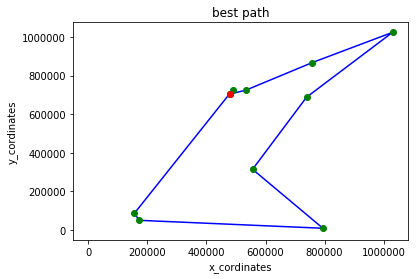

In [145]:
#this block plots the best solution among all the cities
best_of_all=[]
for elements in generation_best[val][0]:
    for node in nodes:
        if (node[0]==elements):
            best_of_all.append(node)  
            
#best path among 500 generations
x_c=[]
y_c=[]
cities=[]
for elements in best_of_all:
    x_c.append(elements[1])
    y_c.append(elements[2])
    cities.append(elements[0])
    
import matplotlib.pyplot as plt
plt.ylabel("y_cordinates")
plt.xlabel("x_cordinates")
plt.title("best path")    
plt.plot(x_c,y_c,"-b")
plt.plot(x_c,y_c,"go",170)
plt.plot(x_c[0],y_c[0],"ro",170)

[1, 8, 109]


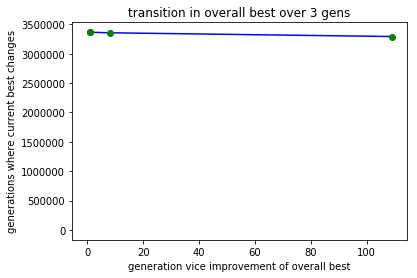

In [146]:
#print(genetic_evolution)
#now show the genetic evolution over iterations
dist=[]
gens=[]

for numbers in genetic_evolution:
    dist.append(numbers[1])
    gens.append(numbers[2])
    
import matplotlib.pyplot as plt
plt.xlabel("generation vice improvement of overall best")
plt.ylabel("generations where current best changes")
plt.title("transition in overall best over {} gens".format(len(gens)))        
plt.plot(gens,dist,"-b")
plt.plot(gens[0],dist[0],"ro",10)
plt.plot(gens,dist,"go",10)
print(gens)

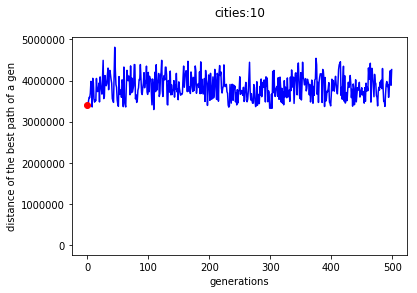

In [147]:
dist=[]
gens=[]
i=0

#print(generation_best).ie. overall best

for numbers in generation_best:
    dist.append(numbers[1])
    gens.append(i)
    i+=1
    
import matplotlib.pyplot as plt
plt.xlabel("generations")
plt.ylabel("distance of the best path of a gen")
plt.title("cities:"+str(nodes_count))        
plt.plot(gens,dist,"-b")
plt.plot(gens[0],dist[0],"ro",10)  

    

([5, 2, 7, 6, 8, 10, 1, 3, 4, 9, 5], 3967794.0000000005)


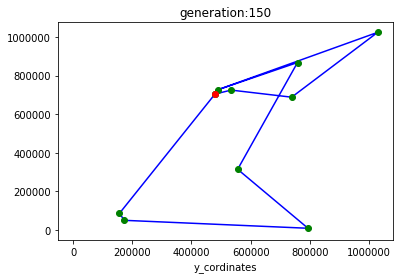

In [148]:
val=150 #which genertion's best do you want to see 
print(generation_best[val])

best_of_all=[]
for elements in generation_best[val][0]:
    for node in nodes:
        if (node[0]==elements):
            best_of_all.append(node)  
            
#best path among 500 generations
x_c=[]
y_c=[]
cities=[]
for elements in best_of_all:
    x_c.append(elements[1])
    y_c.append(elements[2])
    cities.append(elements[0])
plt.xlabel("x_cordinates")
plt.xlabel("y_cordinates")
plt.title("generation:"+str(val))    
plt.plot(x_c,y_c,"-b")
plt.plot(x_c,y_c,"go",170)
plt.plot(x_c[0],y_c[0],"ro",170)

In [ ]:
class tsp:
    
    def __init__(self,file,generation,pop_size,selection,selection_size,cross_over,mutation,mutation_rate,_iter):
        
        self.file = file
        self.pop_size=pop_size
        self.selection_size=selection_size
        self.childs=[]
        self._iter=_iter
        self.generation_best=[]
        self.genetic_evolution=[]
        current_best=None
        nodes_count=None
        self.generation=generation
        self.selection=selection
        self.cross_over=cross_over
        self.mutation=mutation
        
        #takes care of pre processing
        
        def preprocessing():
            import os
            from tqdm import tqdm
            path = os.getcwd()
            path=path+"/TSP dataset" #this is the name of the folder where data is
            os.chdir(path) #navigate to path
            fhand=open(self.file)
            print("name of the file is :",fhand.name)
            self.nodes_count=fhand.readline()# read first line it shows the number of nodes in the problem  
            nodes=fhand.readlines()#
            import random
            i=0
            nodes_tuples=[]
            for elements in nodes:
                elements=elements.strip()
                elements=elements.split(" ")
                elements[0]=int(elements[0])
                elements[1]=int(elements[1])
                elements[2]=int(elements[2])
                elements=tuple(elements)
                nodes_tuples.append(elements)

            nodes=nodes_tuples
            
            #move back one lev in directories
            os.chdir('..')#move back one lev now
            return nodes
            
            
        
        
        self.nodes= preprocessing()
        #population generation
        """either generate random initial population or a heuristic based approach"""
    
        if(generation=="random"):
            self.population=random_samples(self.nodes,self.pop_size)
        elif(generation=="heuristic_1"):
            self.population=heuristic_population(self.nodes,self.pop_size)
        elif(generation=="heuristic_2"):
            self.population=heuristic_population_fast(self.nodes,self.pop_size)
        else:
            self.population=random_samples(self.nodes,self.pop_size) #by default run random

        for iterations in tqdm(range(_iter)): #runs these many generations test
            print("\nrunning generation:{}".format(iterations))
            
            #selection from population  
            """select chromozomes from mating pool either by randomly selecting the most fit chromozomes 
            or by using sus samples"""
            if(selection=="random"):
                fitness_1=fitness_tsp(self.population,self.nodes) #calculates the fitness using fitness function
                val=probability_from_fitness(fitness_1,self.population)#make probability out of the fitness values
                self.selected=random_selection(self.selection_size,val) #random selection
            elif(selection=="sus"):
                fitness_1=fitness_tsp(self.population,self.nodes) #calculates the fitness using fitness function
                val=probability_from_fitness(fitness_1,self.population)#make probability out of the fitness values
                self.selected=prob_based_selection(val,self.selection_size)
            else:#just use random
                fitness_1=fitness_tsp(self.population,self.nodes) #calculates the fitness using fitness function
                val=probability_from_fitness(fitness_1,self.population)#make probability out of the fitness values
                self.selected=random_selection(self.selection_size,val) #sus based selection

            #applying crossovers & mutation and making child
            for i in range(10):#this will make 2 childs every loop
                import random
                st_1=random.randint(0,len(self.selected)-1)#select one strand
                st_2=random.randint(0,len(self.selected)-1)#select second strand
                #print("st_1:{} st_2:{}".format(selected[st_1],selected[st_2]))
                if(cross_over=="uniform"):
                    c1,c2=uniform1_cross_over(self.selected[st_1],self.selected[st_2]) #apply crossovers
                elif(cross_over=="pmx"):
                    c1,c2=pmx(val,self.selection_size)   
                else:#just use uniform
                    c1,c2=uniform1_cross_over(self.selected[st_1],self.selected[st_2]) #apply crossovers
                #mutation phase
                check=random.random()
                if(mutation_rate>check):
                    if(mutation=="reciprocal"):
                        c1=exchange_mutation(c1,1)
                        c2=exchange_mutation(c2,1)
                        self.childs.append(c1)
                        self.childs.append(c2)
                    elif(mutation=="inversion"):
                        c1=inversion_mutation(c1,1)
                        c2=inversion_mutation(c2,1)
                        self.childs.append(c1)
                        self.childs.append(c2)
                    else: #by default use this
                        c1=exchange_mutation(c1,1)
                        c2=exchange_mutation(c2,1)
                        self.childs.append(c1)
                        self.childs.append(c2)
                else:
                    self.childs.append(c1)
                    self.childs.append(c2)

            child_fitness=fitness_tsp(self.childs,self.nodes) #calculates the fitness for each child path , given look up table
            val=child_fitness.index(max(child_fitness)) #max value index in the list of all fitness of childs
            #print("max fitness path is {}, with fitness value: {}".format(childs[val],max(child_fitness)))
            metric=(self.childs[val],1/max(child_fitness))
            #add this to records of best generations
            self.generation_best.append(metric)

            
            
            #compare with overall bests
            if (iterations==0): #then just add the first element as the current best
                self.current_best=metric[1]
                print("this is the current best : {}".format(self.current_best))
            if (metric[1]<self.current_best):
                print("found a better version at:{} generation".format(iterations))
                metric=(self.childs[val],1/max(child_fitness),iterations)
                self.genetic_evolution.append(metric)
                #change my current best as metric 1
                self.current_best=metric[1]

            #now childs become population and the entire process repeats
            self.population=self.childs
    # we need to make a function that computes the distance between the two points based on the x and the y coordinates
    
    def euc_dist(x_1,y_1,x_2,y_2):
        import math
        value=math.sqrt((x_1-x_2)**2+(y_1-y_2)**2)
        result=round(value)
        return result

    def nearest_neighbour_path(nodes):
        paths=[]
        #print("="*50)
        #print("running insertion neighbours method.......\n")
        while len(nodes)!=0:# do this when lines are not zero
            val=random.randint(0,len(nodes)-1)#pick a random node to be removed takes value inc upper bound hence -1
            node=nodes.pop(val) #take out that val in the nodes and save it as the node 
            metric=(node[0],node[1],node[2])# creates metric (city_name , x_c, y_c)

            if(len(paths)<=1):#at first paths is an empty list insert first two elements random

                dist=0 #for empty list dist is zero with prev element 
                paths.append(metric)#add this metric to the empty list

            else:#if the list is not empty ,meaning we have some elements before
                #we will compare distance of this element with all the prev elements

                distances=[] #an empty list with with distances 

                for elements in paths: 
                    dist=euc_dist(node[1],node[2],elements[1],elements[2])
                    distances.append((elements[0],dist))

                #print("already in paths: {}\n".format(paths))
                #print("the distances of pt {} are as follows:{}\n".format(node,distances))

                from operator import itemgetter # run a sort based on distances stored in tuple
                distances.sort(key=itemgetter(1))

                #print("the min distance value is : {}\n".format(distances[0])) #this is the min distance point

                ###find the index of the min distance in the node and insert it
                index_check=distances[0][0] #this is the city after which it should be inserted

                for numbers in paths: #look for that same element in the paths 
                    if(index_check==numbers[0]): #if index matches then
                        index=paths.index(numbers)#this is the index of the path node closest to the slected node
                        #print("found the index {}\n".format(index))
                        paths.insert(index+1,node) #put this element at index +1 pos and move everything right
                        break


        #print("paths are :{}\n".format(paths))

        #print(paths) #print the updated path
        first_ele=paths[0]

        #print("we also need to return back to first city , don't forget that, first element which is :{}".format(first_ele))
        if (paths[0]!=paths[-1]):#prevents over addition of same element on multiple run
            paths.append(first_ele)
        #print("="*50)
        return paths

    def chromozome_to_nodes(chromozome, nodes):
        """this function converts [1,2,3,4,5,1] to [(1,x cord of 1, y cord of 1),(2,x cord of 2, y cord of 2)........
        ...........,(5,x cord of 5, y cord of 5)]"""
        final=[]
        for city in chromozome:#for every element in chromozome
            for node in nodes: #for every node in nodes
                if (node[0]==city): #if the node index= city 
                    final.append(node)#add the full node value to final
        return final

    def overall_cost(paths):
        """given a list of lists it iterates through it and propogates through all nodes and calc distances"""
        total=0
        for i in range(len(paths)):
            try:
                dist=euc_dist(paths[i][1],paths[i][2],paths[i+1][1],paths[i+1][2])
                #print(dist)
            except:
                break
            total+=dist
        return total

    #parse out the values in a new folder in the directory called results and save cost and paths
    def parse_out(output_name, paths,cost): #takes file name and nodes
        first_line=str(cost)+"\n"
        file = open(output_name, "w") 
        file.write(first_line) 
        file.write("\n")
        for elements in paths :
            city=elements[0]
            city=str(city)
            file.write(city)
            file.write("\n")
        file.close() 
        pass

    def pick_nearest_start(nodes):
        #print("="*50)
        #print("running last node fast insertion method.......\n")
        paths=[]
        cost=0
        #print("\nthis is the begining >>>>")
        #print("\nthese are the nodes lot:{}".format(nodes))
        #print("\nthese are the paths lot:{}".format(paths))
        while nodes!=0: #as soon as nodes is empty >>>stop
            if(len(paths)==0 and len(nodes)>0):#its start 
                val=random.randint(0,len(nodes)-1)
                element_removed=nodes.pop(val)
                paths.append(element_removed)
                dist=0
                cost+=dist
            elif(len(paths)!=0 and len(nodes)==0):#termination stage
                #just add the first term back again
                paths.append(paths[0])
                dist=euc_dist(paths[-1][1],paths[-1][2],paths[-2][1],paths[-2][2])
                cost+=dist
                break

            else: #if length is not equal to 0 then there exists some city in the path alredy
                dist=[] # compare the distance of this element present in path already with all the elements in the nodes
                last_node=paths[-1]

                for elements in nodes:
                    d=euc_dist(last_node[1],last_node[2],elements[1],elements[2])
                    dist.append((elements[0],d)) #makes a d list with (city name , distance with the removed node )

                from operator import itemgetter # run a sort based on distances stored in tuple
                dist.sort(key=itemgetter(1))

                index_check=dist[0][0] #this is the city after which it should be inserted
                dist = dist[0][1]

                cost+=dist

                found= [item for item in nodes if (item[0] == index_check)]#search the index of closest node in nodes
                nodes.remove(found[0])#only select the city name and stack it with paths
                paths.append(found[0])

                del dist

        #print("="*50)
        return paths, dist

    #calculate the fitness
    def fitness_tsp(population,nodes):
        """takes entire population and a list of nodes or look up table
        returns fitness"""
        dist=[]
        for chromozomes in population:
            paths=chromozome_to_nodes(chromozomes,nodes)#converts chromozomes to nodes
            val=overall_cost(paths)#calculate the cost of the node path calculated
            fitness_val=1/val #we want the least distance to be most fit hence inverse function takes care of it 
            dist.append(fitness_val) #add fitness
        return dist


    def heuristic_population(nodes,sample_size):
        """this funtion returns me the values from insertion neightbour heuristic as population
        for the genetic algorithm"""
        import copy
        import numpy as np
        samples=[]
        for i in tqdm(range(sample_size)):
            tnodes=copy.deepcopy(nodes)
            paths_1=nearest_neighbour_path(tnodes)#makes random path using heuristic
            #print("final path values are:{}".format(paths_1)) 
            cost_1=overall_cost(paths_1)
            #print("\ntotal cost value is:{}".format(cost_1))
            a=[]
            for vals in paths_1: #chromozoin 
                a.append(vals[0])
            samples.append(a)
        #print("samples are :{}".format(samples)) 
        return samples

    def heuristic_population_fast(nodes,sample_size):
        """this funtion returns me the values from insertion neightbour heuristic as population
        for the genetic algorithm"""
        import copy
        import numpy as np
        samples=[]
        for i in tqdm(range(sample_size)):
            tnodes=copy.deepcopy(nodes)
            paths_1,cost_1=pick_nearest_start(tnodes)
            #print("final path values are:{}".format(paths_1)) 
            #print("\ntotal cost value is:{}".format(cost_1))
            a=[]
            for vals in paths_1:#for city names in a path
                a.append(vals[0])#add all the city names to a new list 
            samples.append(a)
        #print("samples are :{}".format(samples)) 
        return samples
    
    def random_samples(nodes,sample_size):
        import copy
        chromozome=[]
        for i in tqdm(range(sample_size)):
            tnodes=copy.deepcopy(nodes)
            temp=[]
            while len(tnodes)!=0:
                import random as random 
                val=random.randint(0,len(tnodes)-1)
                check=tnodes.pop(val)
                city_no=check[0]
                temp.append(city_no)
            temp.append(temp[0])#one samples generated
            chromozome.append(temp)#add first element back coz the tsp problem deals with returning back to the first city
        return chromozome#n such samples generated

    def probability_from_fitness(fitness_scores,population):
        """returns a tuple of probability based value and the corresponding path"""
        total_fitness=0
        prob=[]
        for element in fitness_scores:
            total_fitness+=element
        for element,chromozome in zip(fitness_scores,population):
            proba_val=element/total_fitness
            proba_val=(proba_val,chromozome)
            prob.append(proba_val)  
        return prob
    
    def prob_based_selection(prob_path,selection_vals):
        """this function randomly picks elements but prioritizes the higher prob routes
        returns me the prob based selected paths/chromozomes and how many we want is denoted by : selection_vals"""
        start=0
        roulette=[]#makes a roulette wheel with high values of the path
        for element in prob_path:
            start=start+element[0]
            metric=(start,element[1])
            roulette.append(metric)
        #print(roulette)

        #now pick a number between 0 and 1 and place it in roulette
        import random

        i=0; prob_based_paths=[]
        for i in range(selection_vals):
            num=random.uniform(0, 1)
            #print("prob_path:{}".format(num))
            #this part picks up the correct chromozome value corresponding to path selected
            start=0
            for element in roulette:
                if (num>=start and num<=element[0]):
                    #print( "value is :{}".format(element[1]))
                    prob_based_paths.append(element[1])
                    break
                else:
                    start=element[0]
                    continue
        return prob_based_paths

    def random_selection(chromozome_no,prob_values):
        """picks up any random values with no relation to probs"""
        #prob by sorted list
        import random
        sorted_by_prob = sorted(prob_values, key=lambda tup: tup[0],reverse=True)#sort by 0th pos i.e probabilities
        #print(sorted_by_prob)
        selected=[]
        for i in range(10):
            num=random.randint(0,len(sorted_by_prob))
            selected.append(sorted_by_prob[num][1])

        return selected
  

    def uniform1_cross_over(strand_1,strand_2):
        """applies uniform crossover over two strands of chromozome"""
        import random
        import math
        import copy

        ## remove the last element for simplicity
        strand_1=strand_1[:-1]
        strand_2=strand_2[:-1]
        #print(strand_1,strand_2)


        #we keep the 50% genes as the same 
        fixed_pos=[] #make a list of fixed pos
        while len(fixed_pos)<math.floor(len(strand_1)/2):
            val=random.randint(0,len(strand_1)-1) 
            if(val not in fixed_pos):
                fixed_pos.append(val)
        #print("fixed_pos are :{}".format(fixed_pos))

        c1={}; c2={}#this is what to be preserved
        #has dict values as - index:value to be put 

        for element in fixed_pos:
            c1[element]=strand_1[element]
            c2[element]=strand_2[element]

        #print("fixed c1 dict is :{} , c2 dict is :{}".format(c1,c2))

        #the alphabets that need to be preserved are there in the ditionaries 

        #now we need to get ourselves crossing over the other values 
        ind=0
        for element in strand_2:#for all values in strand 2
            if(element in c1.values()): #if element in c1 values
                continue
            else: #if element is not there in the c1 strand
                while (ind in c1.keys()):#checking the index in c1
                    ind+=1
                    continue
                c1[ind]=element #add to dictionary
                ind+=1

        #child-2 

        ind=0
        for element in strand_1:#for all values in strand 2
            if(element in c2.values()): #if element in c1 values
                continue
            else: #if element is not there in the c1 strand
                while (ind in c2.keys()):#checking the index in c1
                    ind+=1
                    continue
                c2[ind]=element #add to dictionary
                ind+=1

        #print("strand c1 is: {} , c2 is : {}".format(c1,c2))

        #after having the fixed pos move elements of strand 2 in list 1 and vice versa

        #reconstruction phase
        ch1=[];ch2=[]

        for key1,key2 in zip(sorted(c1.keys()),sorted(c2.keys())):
            val1=c1[key1]
            ch1.append(val1)
            val2=c2[key2]
            ch2.append(val2)

        #print(ch1,ch2)
        #now add the first element back to the strands 
        first=ch1[0]
        ch1.append(first)
        first=ch2[0]
        ch2.append(first)



        return ch1,ch2

    def exchange_mutation(strand_1,mutation):
        """takes strand to mutate and how many mutations to make
        returns the mutated strand"""
        import random
        cycle=0
        while cycle!=mutation: #cycle couter
            #we cant mutate the first city and last because that's the returning point
            first=random.randint(1,len(strand_1)-2)#why -2 because -1 for len value substract and another -1  not selecting last city
            second=random.randint(1,len(strand_1)-2)
            while(first==second):#to make sure the same two blocks are not selected
                second=random.randint(1,len(strand_1)-2) 
            #now we apply mutation by swapping numbers
            strand_1[first],strand_1[second]=strand_1[second],strand_1[first] #swapping operation
            cycle+=1

        return strand_1
    
    def inversion_mutation(strand_1,mutation):
        """takes strand to mutate and how many mutations to make
        returns the mutated strand"""
        import random
        cycle=0
        strand_1=strand_1[:-1]
        while cycle!=mutation: #cycle couter
            #we cant mutate the first city and last because that's the returning point
            first=random.randint(0,len(strand_1)-1)#not to select the last city
            second=random.randint(0,len(strand_1)-1)
            while(first==second):#to make sure the same two blocks are not selected
                second=random.randint(0,len(strand_1)-1) 
            if (first>second):
                first,second=second,first
            print(first,second)
            #now we apply mutation by swapping numbers
            select=strand_1[first:second+1] #inversion operation
            print(select)
            new=[]#make new strand
            for i in reversed(select):
                new.append(i)
            print(new)
            strand_1[first:second+1] =new#replace selceted with new strand
            cycle+=1
            
        first=strand_1[0]
        strand_1.append(first) 
        return strand_1
    
    def parse_out(self): #takes file name and nodes
        """write in a folder called test run"""
        import os
        path = os.getcwd()
        #this is the name of the folder where data is <<<<#turning this off may help
        os.chdir(path) #navigate to path
        current=min(self.generation_best, key = lambda t: t[1]) #find the min element of based on distance
        path=current[0]
        cost=current[1]
        k="_"#a gap that you want to add
        output_name=str(self.file)+k+str(self.generation)[0]+k+str(self.selection)[0]+k+str(self.cross_over)[0]+k+str(self.mutation)[0]+k+str(self._iter)+".txt"
        #output_name=str(self.file)+k+"config-1"  #<<<<if you want config wise naming
        first_line="cities: "+str(self.nodes_count)+"cost: "+str(cost)
        file = open(output_name, "w") 
        file.write(first_line) 
        file.write("\n")
        for elements in path :
            city=str(elements)
            file.write(city)
            file.write("\n")
        file.close() 
        print("file write successful in :{}".format(path))
        os.chdir('..')#move back one lev now

#file_name ="r_s_u_r_500"+"_"+str(overall_best[1])+".txt"
#parse_out(file_name,overall_best[0],nodes_count,overall_best[1])

In [ ]:
random.seed(183262)
file="inst-4.tsp" #file you want to run your code on
#you might need to put your file in the same directory level if this re run does not work


population_generation="random" #how you want to generate initial population
pop_size=100 #size of the initial population you want to keep
selection="sus"#selection type that y
selection_size=10 #basically how many you want to put into mating pool
cross_over="uniform"#which cross over do you want to use
mutation="reciprocal"#which type of mutation do you want to use
mutation_rate=.1 #how many bits you want mutate depends on this rate to occur (eq to 0.1 mutation rate)
_iter=500 #uptil how many generations do you want to run the code for

#for i in range(5):<<<turn this on or off if you want to run multiple run of the same algorithm as Diarmuid pointed in 
#Discussion forums since seed is set the results can be different for 5 runs still being reproducable
t=tsp(file,population_generation,pop_size,selection,selection_size,cross_over,mutation,mutation_rate,_iter)
t.current_best

In [ ]:
t.current_best

In [ ]:
t.parse_out()

In [ ]:
path=os.getcwd()
print(path)